In [390]:
#物件(object)建構式
class dengue:
    
    def __init__(self,編號,發生週別,性別,年齡,區別,里別):
        self.ID = 編號
        self.week = 發生週別
        self.sex = 性別
        self.age = 年齡
        self.dist = 區別
        self.result = 里別


In [401]:
#讀取資料，建立dataframe

import pandas as pd
import numpy as np
import scipy.stats as stats
import os
import matplotlib.pyplot as plt

file_name=input('請輸入檔案名稱(不包括副檔名):')
file = open('D:\\YAO\\DATA\\YearlyDengue\\%s.csv'%file_name,encoding='big5')

data_list = []
for i in file.readlines():
    data = i.strip()
    data = data.split(',')
    data_list.append(data)
file.close()


file_df = pd.DataFrame(data_list[1:],columns=data_list[0])

condiction = input('是否列印DATAFRAME(y/n)：')
if condiction == 'y':
    print('csv資料前10項：')
    print(file_df.head(10))
    print('----------------')

請輸入檔案名稱(不包括副檔名):103登革熱確診個案一覽
是否列印DATAFRAME(y/n)：y
csv資料前10項：
   編號 發病週別 性別  年齡  區別  里別
0   1    3  男  54  鳳山  老爺
1   2   21  男  46  前鎮  草衙
2   3   21  女  37  小港  港后
3   4   22  男  53  前鎮  明孝
4   5   21  男  35  前鎮  明孝
5   6   21  女  60  前鎮  草衙
6   7   22  女  39  林園  廣應
7   8   22  女  33  旗津  中興
8   9   23  男  36  前鎮  明孝
9  10   22  男  40  前鎮  草衙
----------------


In [392]:
#建立物件:
file_df_column = file_df.columns

編號 = list(file_df.ix[:,file_df_column[0]])
發生週別 = list(file_df.ix[:,file_df_column[1]])
性別  = list(file_df.ix[:,file_df_column[2]])
年齡 = list(file_df.ix[:,file_df_column[3]])
區別  = list(file_df.ix[:,file_df_column[4]])
里別  = list(file_df.ix[:,file_df_column[5]])

#利用list建立物件
sample_ls = []
for i in range(len(file_df)):
    sample_ls.append(dengue(編號[i],發生週別[i],性別[i],年齡[i],區別[i],里別[i]))

In [393]:
#切年紀
def age_cutters():
    age_cutters = []
    i = 1
    print('切點為：[?-?]')
    while True:
        try:
            age_cutter_min = eval(input('請輸入第%d個區間範圍的最小值：'%i))
            age_cutter_max = eval(input('請輸入第%d個區間範圍的最大值：'%i))
            age_cutter = [age_cutter_min,age_cutter_max]
            age_cutters.append(age_cutter)
            print('第%d切點為：[%d-%d]'%(i,age_cutter_min,age_cutter_max))
            print('-------------------')
            i += 1
            ask = input('是否結束輸入(y/n):')
            if ask == 'y':
                break
        except:
            print('請輸入數字！！！')
    print('age_cutters：',age_cutters)
    print('--------已經切好年齡，物件名稱為：age_cutters---------')
    return age_cutters



In [194]:
a = age_cutters()

切點為：[?-?]
請輸入第1個區間範圍的最小值：0
請輸入第1個區間範圍的最大值：14
第1切點為：[0-14]
-------------------
是否結束輸入(y/n):
請輸入第2個區間範圍的最小值：15
請輸入第2個區間範圍的最大值：29
第2切點為：[15-29]
-------------------
是否結束輸入(y/n):30
請輸入第3個區間範圍的最小值：30
請輸入第3個區間範圍的最大值：44
第3切點為：[30-44]
-------------------
是否結束輸入(y/n):
請輸入第4個區間範圍的最小值：45
請輸入第4個區間範圍的最大值：59
第4切點為：[45-59]
-------------------
是否結束輸入(y/n):
請輸入第5個區間範圍的最小值：60
請輸入第5個區間範圍的最大值：74
第5切點為：[60-74]
-------------------
是否結束輸入(y/n):
請輸入第6個區間範圍的最小值：75
請輸入第6個區間範圍的最大值：99
第6切點為：[75-99]
-------------------
是否結束輸入(y/n):y
age_cutters： [[0, 14], [15, 29], [30, 44], [45, 59], [60, 74], [75, 99]]
--------已經切好年齡，物件名稱為：age_cutters---------


In [394]:
def sample_ls_age_cutted_count(age_cutters,sample_ls):
    age_count = []
    for i in range(len(age_cutters)):
        count = sum(age_cutters[i][0] <= int(p.age) <= age_cutters[i][1] for p in sample_ls)
        age_count.append(['[%d - %d]'%(age_cutters[i][0],age_cutters[i][1]),count])
    return age_count


In [395]:
age_cutted_number = sample_ls_age_cutted_count(a,sample_ls)
age_cutted_number

[['[0 - 14]', 1045],
 ['[15 - 29]', 2689],
 ['[30 - 44]', 3333],
 ['[45 - 59]', 3987],
 ['[60 - 74]', 3290],
 ['[75 - 99]', 654]]

In [396]:
def bar_chart(age_cutted_number,count_ls):
    count_ls = []
    count_name =[]
    for i in range(len(age_cutted_number)):
        count_ls.append(age_cutted_number[i][1])
        count_name.append(age_cutted_number[i][0])
    xticks = list(range(len(count_ls)))
    plt.bar(range(len(count_ls)),count_ls)
    plt.xticks(xticks,count_name , rotation=90 )
    plt.grid(linestyle='--', which='major',color='gray')
    plt.show()

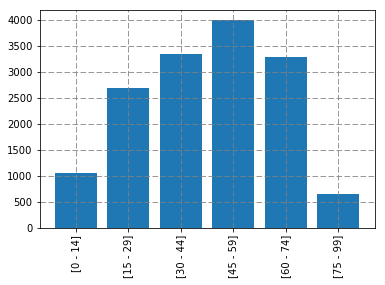

In [397]:
bar_chart(age_cutted_number,count_ls)

In [398]:
#object filter練習  [依照不同age。建立新的物件list]：
def object_cutter_by_age(age_cutters,sample_ls):
    week_filtered_by_age_ls = []
    for i in range(len(age_cutters)):
        object_ls_cutted_by_age_bool = list(age_cutters[i][0] <= int(p.age) <= age_cutters[i][1] for p in sample_ls)
        sample_ls_fil_by_age = [] 
        for j in range(len(sample_ls)):
            if object_ls_cutted_by_age_bool[j]:
                sample_ls_fil_by_age.append(sample_ls[j])
        week_filtered_by_age = list(p.week for p in sample_ls_fil_by_age)
        week_filtered_by_age_ls.append([age_cutters[i],week_filtered_by_age])
    return week_filtered_by_age_ls

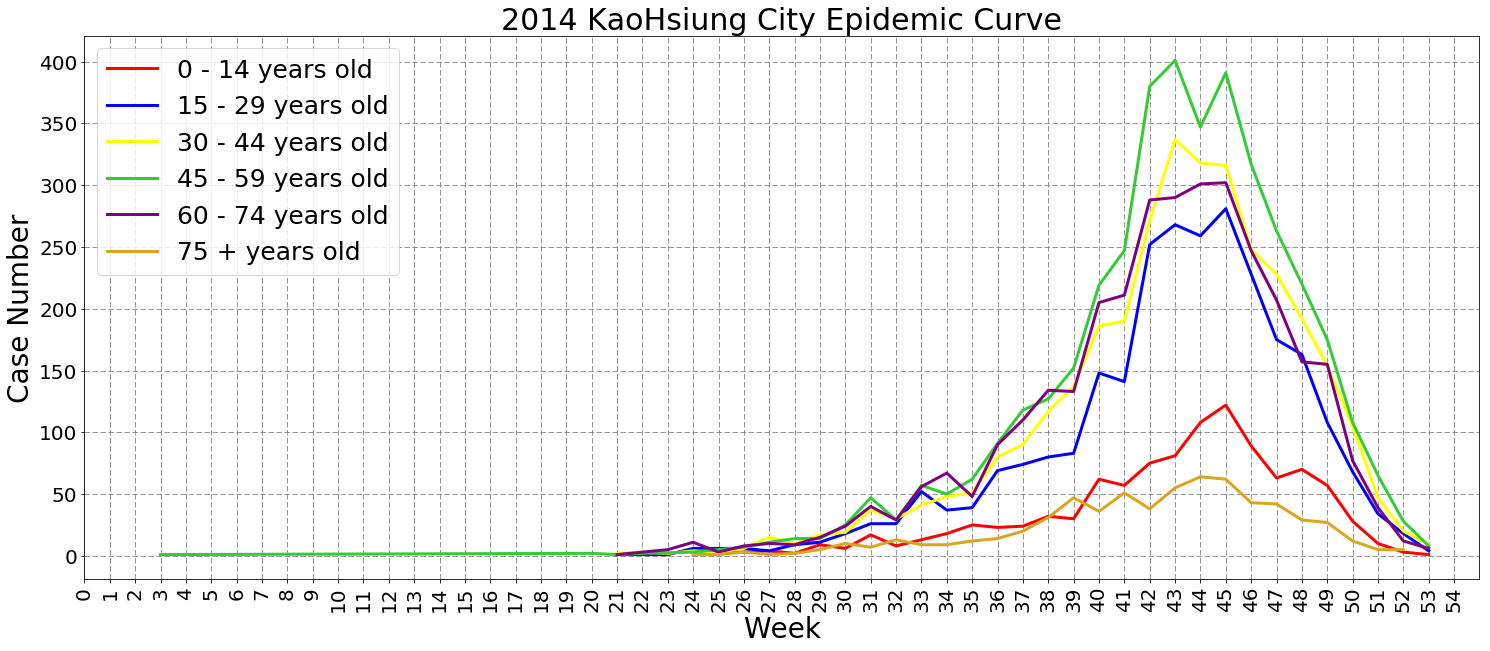

In [407]:
object_filtered_ls = object_cutter_by_age(a ,sample_ls)

colors = ['red','blue','yellow','limegreen','purple','goldenrod']
plt.figure(figsize=(25,10))
for i in range(len(object_filtered_ls)):
    xy = object_filtered_ls[i][1]
    xy_set = set(xy)
    x = []
    y = []
    for j in range(len(xy_set)):
        try:
            xy_pop = xy_set.pop()
            x.append(int(xy_pop))
            y.append(xy.count(xy_pop))
        except:
            continue
    xy=[]
    for j in range(len(x)):
        xy.append([x[j],y[j]])
    
    xy_sorted = sorted(xy , key=lambda k: [k[0], k[1]])
    x = []
    y = []
    for j in range(len(xy_sorted)):
        x.append(xy_sorted[j][0])
        y.append(xy_sorted[j][1])
    #print(x)
    #print(y)
    plt.plot(x, y,color=colors[i],linewidth=3.0)
legend_age = []
for i in range(len(a)-1):
    min1 = a[i][0]
    max1 = a[i][1]
    legend_age.append('%d - %d years old'%(min1,max1))
legend_age.append('%d + years old'%a[-1][0])
plt.title('%d KaoHsiung City Epidemic Curve'%(int(file_name[0:3])+1911),fontsize=30)
plt.legend(legend_age,fontsize=25)
plt.xlabel('Week',fontsize=28)
plt.ylabel('Case Number',fontsize=28)
plt.tick_params(axis='both', labelsize=20)

#xticks = ['1']
#for i in range(1,53):
#    xticks.append(str(i))
plt.xticks(list(range(55)),rotation=90)
plt.grid(linestyle='--', which='major',color='gray')
plt.xlim((0,55))
plt.show()

In [228]:
my_list = [[1,2],[0,2],[2,1],[1,1],[2,2],[2,0],[0,1],[1,0],[0,0]]
sorted(my_list , key=lambda k: [k[1], k[0]])

[[0, 0], [1, 0], [2, 0], [0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [2, 2]]

In [370]:
set1=set('1')
set1.remove('2')
set1

KeyError: '2'

In [272]:
plt.legend().

SyntaxError: invalid syntax (<ipython-input-272-63123d75d876>, line 1)